In [1]:
import csv, json
from pprint import pprint
from scipy.stats import pearsonr
from operator import itemgetter
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

from IPython.core.debugger import Tracer; debug_here = Tracer()

In [2]:
# Get user sum edit biases
sum_biases = defaultdict(int)
editcounts = defaultdict(int)
csvpath = '/home/michael/school/cprose_research/wp/wikipedia/data/IPC_userBiases.csv'
with open(csvpath) as csvfile:
    for row in csv.DictReader(csvfile):
        name = row['Username']
        if name != '':
            editcounts[name] += 1
            if editcounts[name] >= 15:
                sum_biases[row['Username']] += float(row['User avg edit bias'])
        
len(sum_biases)

4256

In [3]:
# Open JSON files of editor citation bias lists
filepath = '/home/michael/school/cprose_research/wp/wikipedia/data/editor_citationbias_novandal.json'
with open(filepath) as f:
    novandal = json.load(f)
print("No vandal, normalized")
pprint(novandal[:5])
pprint(novandal[-5:])
print()

#filepath = '/home/michael/school/cprose_research/wp/wikipedia/data/editor_citationbias_novandal_contrib.json'
#with open(filepath) as f:
#    nov_contrib = json.load(f)
#print("No vandal contrib")
#pprint(novandal[:5])
#pprint(novandal[-5:])
#print()
#
#filepath = '/home/michael/school/cprose_research/wp/wikipedia/data/editor_citationbias.json'
#with open(filepath) as f:
#    allcit= json.load(f)
#print("All pages, normalized")
#pprint(allcit[:5])
#pprint(allcit[-5:])
#print()
#
#filepath = '/home/michael/school/cprose_research/wp/wikipedia/data/editor_citationbias_norv.json'
#with open(filepath) as f:
#    norv = json.load(f)
#print("No reverts, normalized")
#pprint(norv[:5])
#pprint(norv[-5:])
#print()

No vandal, normalized
[['Al Ameer son', [-255, -2.920692136214118]],
 ['Sean.hoyland', [12, -2.3617102353106882]],
 ['Nableezy', [-107, -1.8442669192123466]],
 ['Abie the Fish Peddler', [-19, -1.6010607263934813]],
 ['Wickey-nl', [-64, -1.4164836198031896]]]
[['Ynhockey', [145, 4.186494406559169]],
 ['GHcool', [180, 5.305525828963571]],
 ['Reenem', [396, 7.622056229052159]],
 ['Gilabrand', [258, 7.680214139504691]],
 ['Wikifan12345', [262, 9.492144708865805]]]



In [4]:
# combined sums
combinedsum = {}
for line in novandal:
    name = line[0]
    if name in sum_biases.keys():
        bias = sum_biases[name]
        combinedsum[name] = {'sumbias': bias, 'citebias': line[1][1]}
        
len(combinedsum)

4179

In [5]:
ab = []
cb = []
names = []

for name in combinedsum:
    if combinedsum[name]['citebias'] != 0.0:
        names.append(name)
        ab.append(combinedsum[name]['sumbias'])
        cb.append(combinedsum[name]['citebias'])

len(ab)

1650

In [6]:
data = pd.DataFrame([z for z in zip(names, cb, ab)], columns=['name', 'citation bias', 'sum bias'])

In [9]:
# Get quartiles
q = pd.qcut(data['sum bias'], 4, labels=['pal', 'palneutral', 'isrneutral', 'isr'])
q[:10]

0    palneutral
1    palneutral
2    palneutral
3           pal
4    isrneutral
5           isr
6           pal
7           pal
8           pal
9    palneutral
Name: sum bias, dtype: category
Categories (4, object): [pal < palneutral < isrneutral < isr]

In [18]:
# Get quartiles for citation bias
data['citation_bias_category'] = pd.qcut(data['citation_bias'], 4, labels=['pal', 'palneutral', 'isrneutral', 'isr'])

In [19]:
data[:10]

,name,citation_bias,sum_bias,sum_bias_category,citation_bias_category
0,Mattbr,0.000655,-0.228611,palneutral,palneutral
1,Smart30,0.000132,-0.011392,palneutral,palneutral
2,Metropolitan90,-0.020833,-0.094183,palneutral,pal
3,Jgui,-0.032397,-4.538911,pal,pal
4,StoneProphet,-0.004425,0.133534,isrneutral,palneutral
5,AmirSurfLera,0.333172,5.868574,isr,isr
6,FergusM1970,0.095559,-0.838195,pal,isr
7,Trinitresque,-0.027027,-0.687653,pal,pal
8,24.189.97.251,-0.006993,-1.927444,pal,palneutral
9,Lady 6thofAu,-0.050000,-0.166010,palneutral,pal


In [35]:
s = data['citation_bias_category']
s[s=='palneutral'] = 'isrneutral'
data['citation_bias_category'] = s
data['citation_bias_category'] = data['citation_bias_category'].cat.remove_unused_categories()

data['citation_bias_category'] = data['citation_bias_category'].cat.rename_categories(['pal', 'neutral', 'isr'])
data['citation_bias_category']

0     neutral
1     neutral
2         pal
3         pal
4     neutral
5         isr
6         isr
7         pal
8     neutral
9         pal
10        isr
11        pal
12    neutral
13    neutral
14    neutral
...
1635    neutral
1636    neutral
1637        isr
1638        isr
1639    neutral
1640        pal
1641        isr
1642        pal
1643        isr
1644        pal
1645    neutral
1646        isr
1647    neutral
1648    neutral
1649    neutral
Name: citation_bias_category, Length: 1650, dtype: category
Categories (3, object): [pal < neutral < isr]

In [34]:
s = data['sum_bias_category']
s[s=='palneutral'] = 'isrneutral'
data['sum_bias_category'] = s
data['sum_bias_category'] = data['sum_bias_category'].cat.remove_unused_categories()

data['sum_bias_category'] = data['sum_bias_category'].cat.rename_categories(['pal', 'neutral', 'isr'])
data['sum_bias_category']

0     neutral
1     neutral
2     neutral
3         pal
4     neutral
5         isr
6         pal
7         pal
8         pal
9     neutral
10        isr
11        isr
12    neutral
13        pal
14    neutral
...
1635    neutral
1636    neutral
1637        isr
1638    neutral
1639    neutral
1640        isr
1641        pal
1642        pal
1643    neutral
1644        isr
1645        isr
1646    neutral
1647    neutral
1648        isr
1649    neutral
Name: sum_bias_category, Length: 1650, dtype: category
Categories (3, object): [pal < neutral < isr]

In [20]:
len(data)

1650

In [38]:
data

,name,citation_bias,sum_bias,sum_bias_category,citation_bias_category,False
0,Mattbr,0.000655,-0.228611,neutral,neutral,isrneutral
1,Smart30,0.000132,-0.011392,neutral,neutral,isrneutral
2,Metropolitan90,-0.020833,-0.094183,neutral,pal,isrneutral
3,Jgui,-0.032397,-4.538911,pal,pal,isrneutral
4,StoneProphet,-0.004425,0.133534,neutral,neutral,isrneutral
5,AmirSurfLera,0.333172,5.868574,isr,isr,isrneutral
6,FergusM1970,0.095559,-0.838195,pal,isr,isrneutral
7,Trinitresque,-0.027027,-0.687653,pal,pal,isrneutral
8,24.189.97.251,-0.006993,-1.927444,pal,neutral,isrneutral
9,Lady 6thofAu,-0.050000,-0.166010,neutral,pal,isrneutral


In [40]:
data.columns

Index(['name', 'citation_bias', 'sum_bias', 'sum_bias_category', 'citation_bias_category', False], dtype='object')

In [41]:
data.drop(False)

,name,citation_bias,sum_bias,sum_bias_category,citation_bias_category,False
1,Smart30,0.000132,-0.011392,neutral,neutral,isrneutral
2,Metropolitan90,-0.020833,-0.094183,neutral,pal,isrneutral
3,Jgui,-0.032397,-4.538911,pal,pal,isrneutral
4,StoneProphet,-0.004425,0.133534,neutral,neutral,isrneutral
5,AmirSurfLera,0.333172,5.868574,isr,isr,isrneutral
6,FergusM1970,0.095559,-0.838195,pal,isr,isrneutral
7,Trinitresque,-0.027027,-0.687653,pal,pal,isrneutral
8,24.189.97.251,-0.006993,-1.927444,pal,neutral,isrneutral
9,Lady 6thofAu,-0.050000,-0.166010,neutral,pal,isrneutral
10,GHcool,5.305526,35.627722,isr,isr,isrneutral


In [42]:
# Count accuracy
ncorrect = 0

for row in data.values:
    if row[-3] == row[-2]:
        ncorrect += 1
        
        
print(ncorrect, ncorrect/len(data))

812 0.4921212121212121


In [49]:
print(len(data[data['sum_bias_category']=='neutral']))
print(len(data[data['sum_bias_category']=='isr']))
print(len(data[data['sum_bias_category']=='pal']))

824
413
413


In [47]:
len(data[data['citation_bias_category']=='neutral'])

827

In [48]:
print(len(data[data['citation_bias_category']=='isr']))
print(len(data[data['citation_bias_category']=='pal']))

410
413


In [14]:
data.columns

Index(['name', 'citation bias', 'sum bias', 'category'], dtype='object')

In [17]:
data.columns = ['name', 'citation_bias', 'sum_bias', 'sum_bias_category']
data.columns

Index(['name', 'citation_bias', 'sum_bias', 'sum_bias_category'], dtype='object')

In [12]:
data['category'] = q
data[:10]

,name,citation bias,sum bias,category
0,Mattbr,0.000655,-0.228611,palneutral
1,Smart30,0.000132,-0.011392,palneutral
2,Metropolitan90,-0.020833,-0.094183,palneutral
3,Jgui,-0.032397,-4.538911,pal
4,StoneProphet,-0.004425,0.133534,isrneutral
5,AmirSurfLera,0.333172,5.868574,isr
6,FergusM1970,0.095559,-0.838195,pal
7,Trinitresque,-0.027027,-0.687653,pal
8,24.189.97.251,-0.006993,-1.927444,pal
9,Lady 6thofAu,-0.050000,-0.166010,palneutral


In [ ]:
data.to_csv('/home/michael/school/cprose_research/wp/wikipedia/data/editor_categories.csv')

In [2]:
# Get user average edit biases
avg_biases = {}
editcounts = defaultdict(int)
csvpath = '/home/michael/school/cprose_research/wp/wikipedia/data/IPC_userBiases.csv'
with open(csvpath) as csvfile:
    for row in csv.DictReader(csvfile):
        name = row['Username']
        if name != '':
            editcounts[name] += 1
            if editcounts[name] >= 15:
                avg_biases[row['Username']] = float(row['User avg edit bias'])
        
len(avg_biases)

4256

In [4]:
 # Make combined dict for avgs
combined = {}
for line in novandal:
    name = line[0]
    if name in avg_biases.keys():
        avgbias = avg_biases[name]
        combined[name] = {'avgbias': avgbias, 'citebias': line[1][1]}
        
len(combined)

4179

In [12]:
ab = []
cb = []

for name in combinedsum:
    if combinedsum[name]['citebias'] != 0.0:
        ab.append(combinedsum[name]['sumbias'])
        cb.append(combinedsum[name]['citebias'])

len(ab)

1650

In [5]:
ab = []
cb = []

for name in combined:
    if combined[name]['citebias'] != 0.0:
        ab.append(combined[name]['avgbias'])
        cb.append(combined[name]['citebias'])

len(ab)

1650

In [15]:
pearsonr(ab,cb)

(0.42823496355769153, 1.4546798140154914e-74)

In [14]:
with open('/home/michael/Desktop/dumpsum.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(zip(ab, cb), -1 if ab<(min(ab)+((max(ab)-min(ab))/4) else 

In [ ]:
sumbias_max = max(ab)
sumbias_max = min(ab)

In [58]:
sorted_avg_biases = sorted(avg_biases.items(), key=itemgetter(1))
pprint(sorted_avg_biases[:10])
pprint(sorted_avg_biases[-10:])

[('Jax 0677', -33.11646888915824),
 ('58.168.112.38', -5.15976720878299),
 ('Mdarfathnish', -1.6014632245396598),
 ('67.5.156.154', -1.452827966800239),
 ('Shuki74', -1.1077750806571645),
 ('Eeekster', -0.9904758070952264),
 ('Basir88', -0.9019854447750955),
 ('Stargoat', -0.893098447983819),
 ('80.227.168.38', -0.8844606709230035),
 ('152.163.101.13', -0.8677669247491314)]
[('67.181.62.180', 0.791338944944259),
 ('LatinoMuslim', 0.7954286388726912),
 ('67.231.254.14', 0.8230171265148722),
 ('Capt Jack Doicy', 1.0742845573183843),
 ('Ged UK', 1.0757214374363107),
 ('Mcdonal6', 1.1665046142061986),
 ('71.248.74.178', 1.2270434829792567),
 ('175.138.58.20', 1.2900690653138382),
 ('82.1.54.219', 1.41145327474722),
 ('Slatersteven', 1.7885029766728164)]


<function matplotlib.pyplot.show>

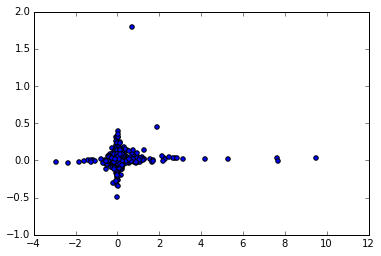

In [63]:
%matplotlib inline
plt.scatter(cb, ab)
plt.show

In [37]:
avg_biases['Al Ameer son']

'-0.0017451124795704678'

In [38]:
min(avg_biases.values())

'-0.0001000038793216168'

In [39]:
type(avg_biases['Al Ameer son'])

str

In [3]:
import csv
import collections

In [4]:
def classify_editor(bias, param):
    if bias > param:
        editor_bias = 'i'
    elif bias < param*-1:
        editor_bias = 'p'
    else:
        editor_bias = 'n'
        
    return editor_bias

In [16]:
csvpath = '/home/michael/school/cprose_research/wp/wp_articles/IPC_userBiases.csv'

# Find specific user
with open(csvpath, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # Skip first row
    for row in reader:
        username = row[1]
        if username == 'Harlan wilkerson':
            print(row[5], row[9], row[12])

United Nations Partition Plan for Palestine 2006-09-16 08:37:26 0.8586607649920523
Deir Yassin massacre 2008-07-04 17:18:56 -1.124294587040307
Deir Yassin massacre 2008-07-04 17:33:55 -0.01599666110435649
United Nations Special Committee on Palestine 2008-07-08 20:07:22 0.7638555033080081
McMahon–Hussein Correspondence 2008-07-09 19:21:16 2.2514427188962998
McMahon–Hussein Correspondence 2008-07-09 19:26:09 -1.2574439747544517
McMahon–Hussein Correspondence 2008-07-09 19:27:23 0.027506050473441235
Balfour Declaration 2008-07-09 19:55:33 -11.571101012458257
Balfour Declaration 2008-07-09 19:57:55 -0.2724029758365134
Balfour Declaration 2008-07-09 19:59:48 0.06711130913496532
McMahon–Hussein Correspondence 2008-07-09 22:32:11 -10.173339685212255
McMahon–Hussein Correspondence 2008-07-09 22:33:49 -0.0468857959608755
McMahon–Hussein Correspondence 2008-07-09 22:44:22 -2.0223611937394423
McMahon–Hussein Correspondence 2008-07-09 22:46:43 0.007300058070917714
McMahon–Hussein Correspondence 2

In [6]:
# Build dictionary of talk page editor bias
csvpath = '/home/michael/school/cprose_research/wp/wp-talk/bias_output/talkpages.csv_biases_50_10.csv'
talk_biases = {}

with open(csvpath, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    
    # Skip first row
    next(reader)
    
    for row in reader:
        username = row[3]
        bias = float(row[5])
        if not username in talk_biases:
            talk_biases[username] = bias
        else:
            talk_biases[username] += bias

print(len(talk_biases)) # Should be 6461

6461


In [3]:
# Fetch combined editor biases from big CSV
combined_csvpath = '/home/michael/school/cprose_research/wp/ipc_editor_bias.csv'
combined_biases = {}

with open(combined_csvpath, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        name = row[0]
        sum_bias = row[1]
        avg_bias = row[2]
        if len(row) > 3:
            talk_bias = row[3]
            combined_biases[name] = [sum_bias, avg_bias, talk_bias]
        else:
            combined_biases[name] = [sum_bias, avg_bias]

len(combined_biases)

346817

In [5]:
# Build dictionary of avg article editor bias
article_avg_biases = {}
csvpath = '/home/michael/school/cprose_research/wp/wp_articles/IPC_userBiases.csv'

with open(csvpath, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # Skip first row
    for row in reader:
        username = row[1]
        if not username in article_avg_biases:
            article_avg_biases[username] = float(row[2])

len(article_avg_biases)

345676

In [8]:
# Build dictionary of sum article editor bias
article_sum_biases = {}
csvpath = '/home/michael/school/cprose_research/wp/wp_articles/IPC_userBiases.csv'

with open(csvpath, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader) # Skip first row
    for row in reader:
        username = row[1]
        if not username in article_sum_biases:
            article_sum_biases[username] = float(row[2])
        else:
            article_sum_biases[username] += float(row[2])

len(article_sum_biases)

345676

In [17]:
# Combine dictionaries for all editors seen
# editor: [sum, avg, talk_page]
combined_biases = {}

# From article edits
for editor in article_sum_biases:
    combined_biases[editor] = [article_sum_biases[editor], article_avg_biases[editor]]

for editor in talk_biases:
    if editor in combined_biases:
        combined_biases[editor].append(talk_biases[editor])
    else:
        combined_biases[editor] = ["", "", talk_biases[editor]]

# Remove anonymous editor
del combined_biases['']

len(combined_biases) # should be 346817

346817

In [27]:
# Create CSV with all editor biases
combined_csvpath = '/home/michael/school/cprose_research/wp/ipc_editor_bias.csv'

with open(combined_csvpath, 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['username', 'article_sum_bias', 'article_avg_bias','talk_page_bias'])
    for editor in combined_biases:
        line = [editor]
        line.extend(combined_biases[editor])
        writer.writerow(line)

In [41]:
# Check consistency of talk page bias model application v article
consistent_editors = []
inconsistent_editors = []
param = 10

for editor in combined_biases:
    if len(combined_biases[editor]) > 2 and not combined_biases[editor][0] == "":
        # Handling neutral classification
        article_class = classify_editor(combined_biases[editor][0], param)
        talk_class = classify_editor(combined_biases[editor][2], param)
        if article_class == 'n' or talk_class == 'n' or article_class == talk_class:
            consistent_editors.append(editor)
        else:
            inconsistent_editors.append(editor)

print("Consistent:", len(consistent_editors))
print("Inconsistent:", len(inconsistent_editors))
print("Total:", len(consistent_editors) + len(inconsistent_editors))

Consistent: 4466
Inconsistent: 853
Total: 5319


In [51]:
# Create mappings from editor to editor ID

editor_ids = collections.OrderedDict()
ctr = 1
for editor in list(editor_biases):
    editor_ids[editor] = ctr
    ctr += 1

In [52]:
# Build test alignment matrix for Yu+ 2015
alignment_matrix = []
threshold = 0
num_editors = 10

for i in range(num_editors):
    editor = list(editor_biases)[i]
    editor_bias = classify_editor(editor_biases[editor], threshold)
    #print(editor, "bias: ", editor_bias)
    editor_vec = []
    #editor_vec.append(editor) # add editor name
    editor_vec.append(editor_ids[editor]) # add editor id
    for j in range(num_editors):
        other_editor = list(editor_biases)[j]
        other_editor_bias = classify_editor(editor_biases[other_editor], threshold)
        #print("\t", other_editor, "bias: ", other_editor_bias)
        if editor_bias == 'i':
            if other_editor_bias == 'i':
                editor_vec.append(1)
            elif other_editor_bias == 'p':
                editor_vec.append(-1)
            else:
                editor_vec.append('')
        elif editor_bias == 'p':
            if other_editor_bias == 'p':
                editor_vec.append(1)
            elif other_editor_bias == 'i':
                editor_vec.append(-1)
            else:
                editor_vec.append('')
        elif editor_bias == 'n':
            editor_vec.append('')
        
    # Add in useless vote
    #editor_vec.append('none')
    
    alignment_matrix.append(editor_vec)

alignment_matrix

[[1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1],
 [2, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1],
 [3, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1],
 [4, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1],
 [5, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1],
 [6, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1],
 [7, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1],
 [8, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1],
 [9, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1],
 [10, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1]]

In [53]:
# Create input file for Yu+ 2015 cluster code
out_filepath = '/home/michael/school/cprose_research/yu+_2015_killer/wp-talk_threshold0/wp-talk_threshold0.txt'
with open(out_filepath, 'w') as out:
    for row in alignment_matrix:
        out.write('\t'.join([str(item) for item in row]) + '\n')

In [54]:
# Create editor mappings file
editor_ids_filepath = '/home/michael/school/cprose_research/yu+_2015_killer/wp-talk_editor_mappings.txt'
with open(editor_ids_filepath, 'w') as f:
    editor_id_keys = list(editor_ids.keys())
    for i in range(len(editor_biases)):
        editor = editor_id_keys[i]
        editor_id = editor_ids[editor]
        editor_bias = editor_biases[editor]
        f.write(str(editor_id) + '\t' + editor + '\t' + str(editor_bias) + '\n')